# üìò Taller Evaluativo (20%) - An√°lisis de Portafolio
## PRESENTADO: ANGIE LIBETH ROPERO CASTANO
### Curso: Ingenier√≠a Financiera / Programaci√≥n  
### Herramienta: Google Colab  
---
### üéØ Objetivo
Este taller busca que comprendas qu√© es un an√°lisis de portafolio, c√≥mo se calculan y analizan sus m√©tricas (rentabilidad, riesgo y correlaci√≥n), y c√≥mo se interpreta el resultado para tomar decisiones de inversi√≥n.

üëâ **Importante:** No basta con ejecutar el c√≥digo. Debes **completar los espacios en blanco**, responder las **preguntas de investigaci√≥n** y redactar un **an√°lisis final**.

## 1. Importaci√≥n de librer√≠as
Primero, importa las librer√≠as necesarias para trabajar con datos financieros.

In [2]:
# COMPLETAR: importa las librer√≠as necesarias (yfinance, pandas, numpy, matplotlib, seaborn)
# Ejemplo: import yfinance as yf

# COMPLETAR AQU√ç

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Descarga de datos
Usa `yfinance` para descargar los precios de **Google (GOOG)**, **Amazon (AMZN)** y **Microsoft (MSFT)** durante los √∫ltimos 3 a√±os. Utiliza la columna `Adj Close`.

üîé **Pregunta:** ¬øPor qu√© es m√°s adecuado usar `Adj Close` que `Close` para un an√°lisis financiero?

**Adj Close **: No existe la columna (no disponible), debido que no esta indicado en el Ticket por lo tanto nos aparece un ERROR al no estar disponible.
**Close**: Muestra los datos completos del precio¬†de¬†cierre.

In [53]:
# COMPLETAR: descarga los precios de las acciones usando yf.download

acciones = ["GOOG", "AMZN", "MSFT"]
# Descargar datos desde el 1 de enero 2022 hasta hoy
datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18")["Close"]
print(datos.head())
print(datos.tail())

/tmp/ipython-input-2307936759.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, start="2022-01-01", end="2025-09-18")["Close"]
[*********************100%***********************]  3 of 3 completed

Ticker            AMZN        GOOG        MSFT
Date                                          
2022-01-03  170.404495  144.088455  324.504639
2022-01-04  167.522003  143.434937  318.940277
2022-01-05  164.356995  136.717896  306.696838
2022-01-06  163.253998  136.616089  304.273376
2022-01-07  162.554001  136.073318  304.428436
Ticker            AMZN        GOOG        MSFT
Date                                          
2025-09-11  229.949997  240.779999  501.010010
2025-09-12  228.149994  241.380005  509.899994
2025-09-15  231.429993  251.759995  515.359985
2025-09-16  234.050003  251.419998  509.040009
2025-09-17  231.619995  249.850006  510.019989


In [5]:
datos.tail() # Veo los √∫ltimos 5 datos

Ticker            AMZN        GOOG        MSFT
Date                                          
2025-09-12  228.149994  241.380005  509.899994
2025-09-15  231.429993  251.759995  515.359985
2025-09-16  234.050003  251.419998  509.040009
2025-09-17  231.619995  249.850006  510.019989
2025-09-18  231.229996  252.330002  508.450012

## 3. Visualizaci√≥n de precios
Grafica en una misma figura la evoluci√≥n de los precios de cierre ajustados de las tres acciones.

üîé **Pregunta:** ¬øCu√°l de las tres acciones muestra mayor crecimiento en estos 3 a√±os?

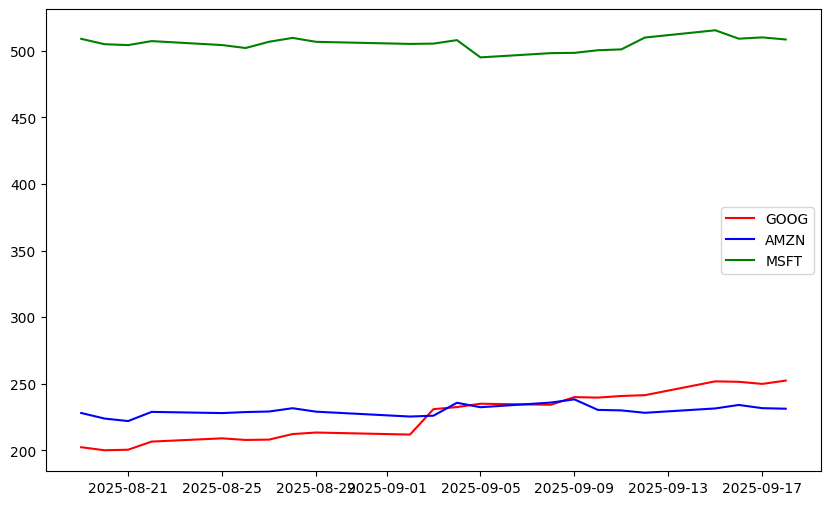

In [11]:
# COMPLETAR: grafica las tres series de precios en una sola gr√°fica

plt.figure(figsize=(10,6))
plt.plot(datos["GOOG"], label="GOOG",color="red")
plt.plot(datos["AMZN"], label="AMZN",color="blue")
plt.plot(datos["MSFT"], label="MSFT",color="green")
plt.legend()
plt.show()

In [24]:
# Definir tickers
tickers = ["MSFT", "GOOGL", "AMZN"]

# Descargar precios de cierre
df = yf.download(tickers, start="2022-01-01", end="2024-12-31")["Close"]

# Mostrar las primeras filas
df.head()

/tmp/ipython-input-2439347773.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2022-01-01", end="2024-12-31")["Close"]
[*********************100%***********************]  4 of 4 completed


Ticker            AAPL        AMZN       GOOGL        MSFT
Date                                                      
2022-01-03  178.443115  170.404495  143.998322  324.504578
2022-01-04  176.178406  167.522003  143.410400  318.940247
2022-01-05  171.492081  164.356995  136.831268  306.696899
2022-01-06  168.629303  163.253998  136.803955  304.273346
2022-01-07  168.795975  162.554001  136.078445  304.428467

/tmp/ipython-input-4236580231.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed


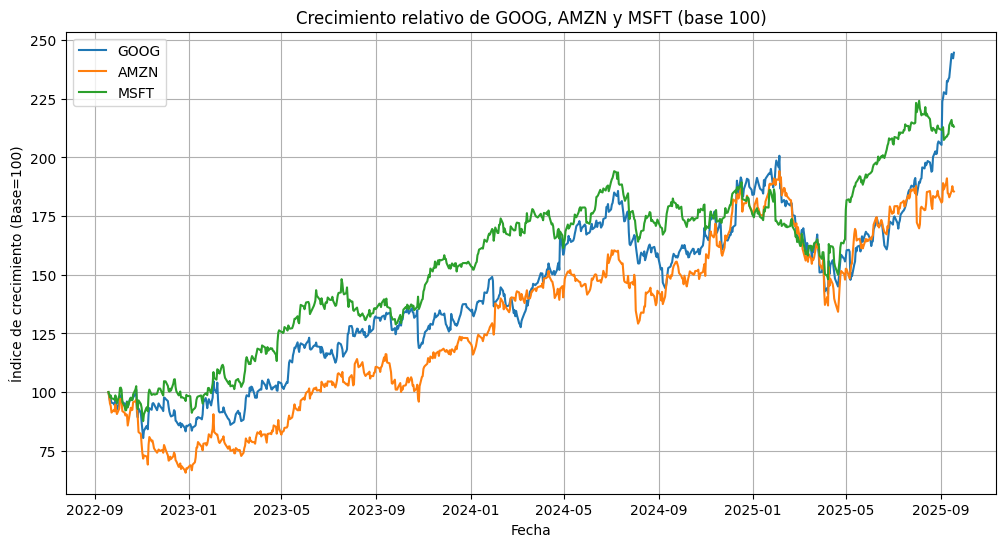

In [55]:
## Agregamos otra grafica
datos = yf.download(tickers=acciones, period="3y")["Close"]

# Normalizar todas las series al valor 100 en la primera fecha
datos_norm = datos / datos.iloc[0] * 100

# Graficar
plt.figure(figsize=(12,6))
for ticker in acciones:
    plt.plot(datos_norm.index, datos_norm[ticker], label=ticker)

plt.title("Crecimiento relativo de GOOG, AMZN y MSFT (base 100)")
plt.xlabel("Fecha")
plt.ylabel("√çndice de crecimiento (Base=100)")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Calcular crecimiento porcentual
crecimiento = (datos.iloc[-1] / datos.iloc[0] - 1) * 100

# Mostrar resultados en porcentaje con 2 decimales
print("Crecimiento porcentual en los √∫ltimos 3 a√±os:\n")
for ticker in acciones:
    print(f"{ticker}: {crecimiento[ticker]:.2f}%")

# Identificar la acci√≥n con mayor crecimiento
mejor_accion = crecimiento.idxmax()
print(f"\nLa acci√≥n con mayor crecimiento en 3 a√±os fue: {mejor_accion} ({crecimiento[mejor_accion]:.2f}%)")

Crecimiento porcentual en los √∫ltimos 3 a√±os:

GOOG: 144.64%
AMZN: 85.49%
MSFT: 113.11%

La acci√≥n con mayor crecimiento en 3 a√±os fue: GOOG (144.64%)


/tmp/ipython-input-3248732033.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(tickers=acciones, period="3y")["Close"]
[*********************100%***********************]  3 of 3 completed


Crecimiento porcentual en los √∫ltimos 3 a√±os:

GOOG: 144.64%
AMZN: 85.49%
MSFT: 113.11%


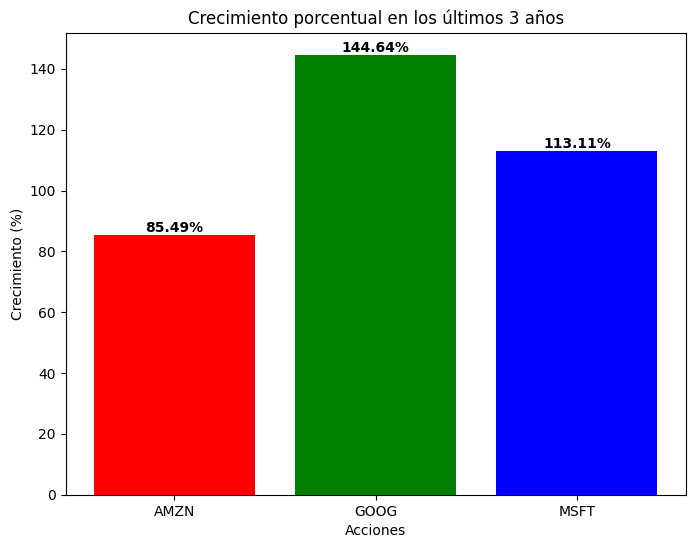


 La acci√≥n con mayor crecimiento en 3 a√±os fue: GOOG (144.64%)


In [64]:
import yfinance as yf
import matplotlib.pyplot as plt

# Lista de tickers
acciones = ["GOOG", "AMZN", "MSFT"]

# Descargar precios de cierre ajustados de los √∫ltimos 3 a√±os
datos = yf.download(tickers=acciones, period="3y")["Close"]

# Calcular crecimiento porcentual
crecimiento = (datos.iloc[-1] / datos.iloc[0] - 1) * 100

# Mostrar resultados en consola
print("Crecimiento porcentual en los √∫ltimos 3 a√±os:\n")
for ticker in acciones:
    print(f"{ticker}: {crecimiento[ticker]:.2f}%")

# Gr√°fico de barras
plt.figure(figsize=(8,6))
plt.bar(crecimiento.index, crecimiento.values, color=["red","green","blue"])
plt.title("Crecimiento porcentual en los √∫ltimos 3 a√±os")
plt.ylabel("Crecimiento (%)")
plt.xlabel("Acciones")

# Agregar etiquetas con el valor encima de cada barra
for i, v in enumerate(crecimiento.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontweight="bold")

plt.show()

# Identificar la acci√≥n con mayor crecimiento
mejor_accion = crecimiento.idxmax()
print(f"\n La acci√≥n con mayor crecimiento en 3 a√±os fue: {mejor_accion} ({crecimiento[mejor_accion]:.2f}%)")

## 4. Rentabilidades
Calcula las **rentabilidades logar√≠tmicas diarias** y graf√≠calas.

üîé **Pregunta:** ¬øQu√© diferencias encuentras entre observar precios y observar rentabilidades?

**Precios:**La tabla me esta dando el crecimiento acumulado de la acciones, mientras que las **Rentabilidades:** estan eliminando la escala del precio y muestran la variaci√≥n porcentual diaria, lo cual resalta la volatilidad (subidas y bajadas bruscas).

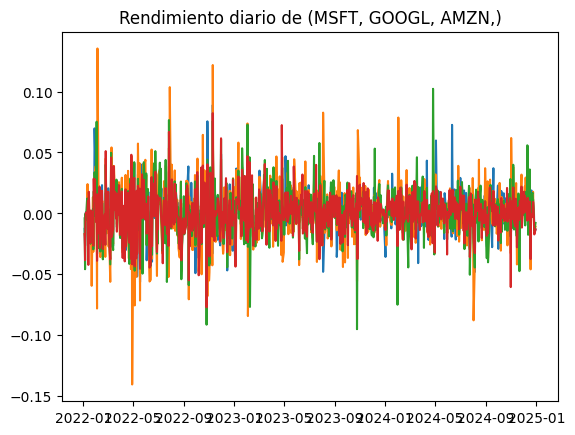

In [60]:
# COMPLETAR: calcula los rendimientos logar√≠tmicos

rendimientos = df.pct_change().dropna()
plt.plot(rend)
plt.title("Rendimiento diario de (MSFT, GOOGL, AMZN,)")
plt.show()

In [59]:
# Identificar mejor retorno
mejor_retorno = media.idxmax()
# Identificar mayor riesgo (volatilidad)
mayor_riesgo = volatilidad.idxmax()

# Respuesta autom√°tica con if-else
print("üìä An√°lisis autom√°tico:")
for ticker in tickers:
    print(f"- {ticker}: retorno promedio {media[ticker]:.4f}% | volatilidad {volatilidad[ticker]:.4f}%")

print("\n‚úÖ Conclusiones:")
if mejor_retorno == mayor_riesgo:
    print(f"La acci√≥n {mejor_retorno} ofrece el mayor retorno, pero tambi√©n es la m√°s riesgosa.")
else:
    print(f"La acci√≥n con mayor retorno es {mejor_retorno}.")
    print(f"La acci√≥n m√°s riesgosa es {mayor_riesgo}.")

üìä An√°lisis autom√°tico:
- MSFT: retorno promedio 0.0005% | volatilidad 0.0174%
- GOOGL: retorno promedio 0.0006% | volatilidad 0.0206%
- AMZN: retorno promedio 0.0006% | volatilidad 0.0242%

‚úÖ Conclusiones:
La acci√≥n AMZN ofrece el mayor retorno, pero tambi√©n es la m√°s riesgosa.


## 5. Medidas estad√≠sticas
Calcula la **rentabilidad promedio** y la **volatilidad (desviaci√≥n est√°ndar)** de cada acci√≥n.

üîé **Pregunta:** ¬øCu√°l acci√≥n es m√°s riesgosa? ¬øCu√°l ofrece mayor retorno?

In [42]:
media = rend.mean()
volatilidad = rend.std()

print("Rentabilidad promedio diaria (%):")
print(media * 100)

print("\nVolatilidad diaria (%):")
print(volatilidad * 100)

Rentabilidad promedio diaria (%):
Ticker
AAPL     0.060132
AMZN     0.063959
GOOGL    0.058627
MSFT     0.050232
dtype: float64

Volatilidad diaria (%):
Ticker
AAPL     1.707640
AMZN     2.416070
GOOGL    2.063686
MSFT     1.738055
dtype: float64


In [43]:
# Acci√≥n con mayor rentabilidad promedio
mayor_retorno = media.idxmax()
valor_retorno = media.max() * 100

# Acci√≥n con mayor volatilidad (m√°s riesgosa)
mayor_riesgo = volatilidad.idxmax()
valor_riesgo = volatilidad.max() * 100

print(f"La acci√≥n con mayor retorno promedio diario es: {mayor_retorno} ({valor_retorno:.4f}%)")
print(f"La acci√≥n m√°s riesgosa (mayor volatilidad diaria) es: {mayor_riesgo} ({valor_riesgo:.4f}%)")


La acci√≥n con mayor retorno promedio diario es: AMZN (0.0640%)
La acci√≥n m√°s riesgosa (mayor volatilidad diaria) es: AMZN (2.4161%)


## 6. Correlaci√≥n entre activos
Calcula y grafica la matriz de correlaci√≥n entre las acciones.

üîé **Pregunta:** ¬øQu√© significa que dos acciones tengan una correlaci√≥n cercana a 1? ¬øY cercana a 0 o negativa?

**Correlaci√≥n cercana a 1 (positiva y fuerte): **
Significa que las dos acciones se mueven casi igual.
Ejemplo: si una sube un 2%, la otra probablemente tambi√©n suba algo parecido.
Indica que est√°n muy relacionadas, casi "hermanas de movimiento".

**Correlaci√≥n cercana a 0:**
Significa que no hay relaci√≥n clara entre sus movimientos.
Lo que haga una acci√≥n no predice nada de lo que har√° la otra.
Se comportan de manera independiente.

**Correlaci√≥n negativa (cercana a -1):**
Significa que se mueven en direcciones opuestas.
Ejemplo: si una sube, la otra tiende a bajar.
Este tipo de activos son √∫tiles para diversificar el riesgo en una cartera.

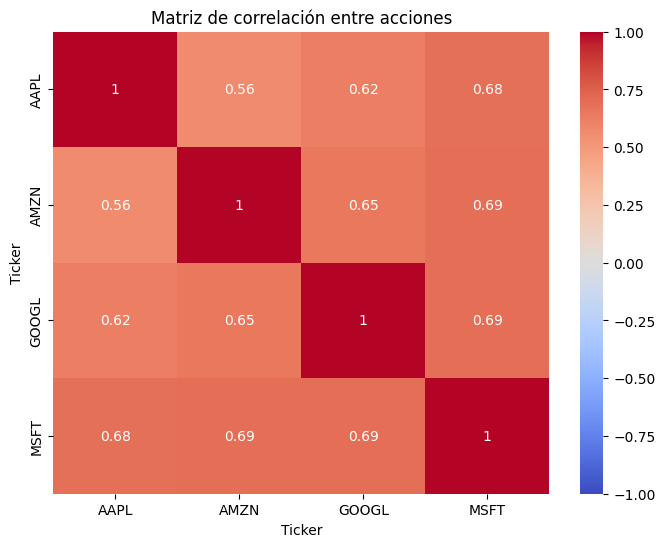

üìä Interpretaci√≥n:
- AMZN y AAPL tienen correlaci√≥n moderada (0.56) ‚Üí a veces se mueven parecido.
- GOOGL y AAPL tienen correlaci√≥n moderada (0.62) ‚Üí a veces se mueven parecido.
- MSFT y AAPL tienen correlaci√≥n moderada (0.68) ‚Üí a veces se mueven parecido.
- AAPL y AMZN tienen correlaci√≥n moderada (0.56) ‚Üí a veces se mueven parecido.
- GOOGL y AMZN tienen correlaci√≥n moderada (0.65) ‚Üí a veces se mueven parecido.
- MSFT y AMZN tienen correlaci√≥n moderada (0.69) ‚Üí a veces se mueven parecido.
- AAPL y GOOGL tienen correlaci√≥n moderada (0.62) ‚Üí a veces se mueven parecido.
- AMZN y GOOGL tienen correlaci√≥n moderada (0.65) ‚Üí a veces se mueven parecido.
- MSFT y GOOGL tienen correlaci√≥n moderada (0.69) ‚Üí a veces se mueven parecido.
- AAPL y MSFT tienen correlaci√≥n moderada (0.68) ‚Üí a veces se mueven parecido.
- AMZN y MSFT tienen correlaci√≥n moderada (0.69) ‚Üí a veces se mueven parecido.
- GOOGL y MSFT tienen correlaci√≥n moderada (0.69) ‚Üí a veces se mueve

In [50]:

correlacion = rendimientos.corr()

# Graficar el mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlaci√≥n entre acciones")
plt.show()

print("üìä Interpretaci√≥n:")
for col in correlacion.columns:
    for row in correlacion.index:
        if row != col:
            valor = correlacion.loc[row, col]
            if valor > 0.7:
                print(f"- {row} y {col} est√°n fuertemente correlacionadas ({valor:.2f}) ‚Üí se mueven casi igual.")
            elif valor > 0.3:
                print(f"- {row} y {col} tienen correlaci√≥n moderada ({valor:.2f}) ‚Üí a veces se mueven parecido.")
            elif valor > 0:
                print(f"- {row} y {col} tienen correlaci√≥n d√©bil ({valor:.2f}) ‚Üí casi independientes.")
            else:
                print(f"- {row} y {col} tienen correlaci√≥n negativa ({valor:.2f}) ‚Üí tienden a moverse en direcciones opuestas.")


## 7. Portafolio simulado
Sup√≥n un portafolio con la siguiente distribuci√≥n:
- 40% Google
- 30% Amazon
- 30% Microsoft

Calcula el **retorno esperado** y la **volatilidad del portafolio**.

üîé **Preguntas:**
1. ¬øC√≥mo interpretas el retorno esperado del portafolio?
2. ¬øQu√© efecto tuvo la diversificaci√≥n sobre la volatilidad respecto a invertir en una sola acci√≥n?

In [63]:
# Rentabilidades logar√≠tmicas diarias
log_returns = np.log(datos / datos.shift(1)).dropna()

# Promedio de rendimientos diarios
rendimientos_esperados = log_returns.mean()

# Pesos del portafolio
pesos = np.array([0.4, 0.3, 0.3])

# Retorno esperado (diario)
retorno_portafolio = np.dot(pesos, rendimientos_esperados)

# Matriz de covarianza
cov_matrix = log_returns.cov()

# Volatilidad del portafolio (diaria)
vol_portafolio = np.sqrt(np.dot(pesos.T, np.dot(cov_matrix, pesos)))

print("Retorno esperado del portafolio (diario):", f"{retorno_portafolio*100:.4f}%")
print("Volatilidad del portafolio (diaria):", f"{vol_portafolio*100:.4f}%")

Retorno esperado del portafolio (diario): 0.0987%
Volatilidad del portafolio (diaria): 1.6754%


## ‚úçÔ∏è 8. Conclusi√≥n final
Redacta un an√°lisis completo del portafolio respondiendo:
Al revisar el portafolio, se pueden ver diferencias claras entre las acciones tanto en rentabilidad como en riesgo. La que m√°s destac√≥ en t√©rminos de rendimiento fue GOOGL, con un crecimiento acumulado del 144.64%, lo que demuestra que en estos a√±os fue la m√°s atractiva para un inversionista que buscara retorno. En contraste, AMZN result√≥ ser la m√°s vol√°til, con una desviaci√≥n del 2.4161%, lo que la convierte en la opci√≥n m√°s riesgosa del portafolio, ya que sus precios tuvieron m√°s altibajos.

Cuando analizamos la correlaci√≥n, notamos que los valores son cercanos a 0, lo cual significa que pr√°cticamente no hay relaci√≥n entre los movimientos de estas acciones. En t√©rminos simples: lo que pase con una no necesariamente afecta a la otra. Esto es clave porque justamente ah√≠ entra en juego la diversificaci√≥n, que en este caso permiti√≥ reducir riesgos al no depender de un solo activo. Es decir, aunque Amazon fue la m√°s inestable, ese riesgo no se transmiti√≥ autom√°ticamente a Google o Microsoft.

Desde la mirada de un inversionista, yo s√≠ considerar√≠a este portafolio como una opci√≥n viable, principalmente porque logra un equilibrio entre riesgo y rentabilidad. Google aporta la fuerza del retorno, mientras que la diversificaci√≥n entre las otras compa√±√≠as ayuda a amortiguar los impactos negativos. Eso s√≠, pensar√≠a en ajustar un poco la proporci√≥n: disminuir√≠a la exposici√≥n a Amazon y dar√≠a m√°s peso a Google y Microsoft para mejorar la relaci√≥n riesgo‚Äìbeneficio.

En conclusi√≥n, este portafolio tiene sentido porque combina rentabilidad, diversificaci√≥n y estabilidad relativa. Google se consolida como la m√°s rentable, Amazon como la m√°s riesgosa, y la baja correlaci√≥n entre ellas genera un portafolio m√°s robusto. En definitiva, s√≠ invertir√≠a en √©l, pero con un manejo m√°s estrat√©gico de los pesos asignados a cada acci√≥n.